In [1]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
#nlp = spacy.load("en_core_web_sm")

In [1]:
!pip install snscrape

In [2]:
!pip install textblob

In [3]:
!pip install wordcloud

In [4]:
!pip install spacy

## Q2) What is the sentiment of tweets addressing inflation concerns over time using the longest time period that you can?

## We check for the tweets that match with the phrase "inflation" for the year 2022,2021,2020 from each month

In [13]:
word = 'inflation'
mo = [i for i in range(1,13)]
str1 = [str('2020-' + str(i) + '-01') for i in range(1,13)]
str2 = [str('2020-' + str(i) + '-28') for i in range(1,13)]

## Scraping upto 100k tweets for each month of each year of 2022,2021,2020

In [14]:
tweets_list = []
maxTweets = 100000
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,j in zip(str1,str2):
    string1 = str(word + ' since:' + str(i) + ' until:' + str(j))
    #print(str('recession 2023' + ' since:' + i + ' until:' + j))
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(string1).get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content])
    print("Done",string1)#str('recession 2023' + ' since:' + i + ' until:' + j))

Done inflation since:2020-1-01 until:2020-1-28
Done inflation since:2020-2-01 until:2020-2-28
Done inflation since:2020-3-01 until:2020-3-28
Done inflation since:2020-4-01 until:2020-4-28
Done inflation since:2020-5-01 until:2020-5-28
Done inflation since:2020-6-01 until:2020-6-28
Done inflation since:2020-7-01 until:2020-7-28
Done inflation since:2020-8-01 until:2020-8-28
Done inflation since:2020-9-01 until:2020-9-28
Done inflation since:2020-10-01 until:2020-10-28
Done inflation since:2020-11-01 until:2020-11-28
Done inflation since:2020-12-01 until:2020-12-28


In [15]:
tweets_to_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text'])

In [16]:
tweets_to_df.to_csv("inflation_2020.csv")

In [56]:
df_2022 = pd.read_csv('inflation_2022.csv')
df_2021 = pd.read_csv('inflation_2021.csv')
df_2020 = pd.read_csv('inflation_2020.csv')

In [57]:
df_2022

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2022-01-27 23:59:57+00:00,1486851503079841792,@ThisChickBev Inflation
1,1,2022-01-27 23:59:56+00:00,1486851500013875201,"@SecYellen &amp; inflation at 7% , Americans a..."
2,2,2022-01-27 23:59:48+00:00,1486851465226469379,@America00983474 @BayAreaSportsF7 @Chechi70 @e...
3,3,2022-01-27 23:59:47+00:00,1486851459652014081,David Dayan clearly explains how the current i...
4,4,2022-01-27 23:59:44+00:00,1486851447379705860,"@JoeBiden Inflation, Joe. It’s on you. Stop ..."
...,...,...,...,...
120007,120007,2022-12-10 17:42:14+00:00,1601633402415124481,2023 - Recession And Inflation. https://t.co/x...
120008,120008,2022-12-10 17:42:08+00:00,1601633374694944770,@POTUS Record inflation *
120009,120009,2022-12-10 17:42:05+00:00,1601633362279817216,@romanianrosieee Biden inflation
120010,120010,2022-12-10 17:42:02+00:00,1601633350980030465,"@cherry_lfc @POTUS Your student debt isn't ""fo..."


In [58]:
df_2022 = df_2022[['Text']]
df_2021 = df_2021[['Text']]
df_2020 = df_2020[['Text']]

In [59]:
df_2021

,Text
0,@CBCTheNational And yet she gets a lifetime in...
1,@FUT_NoTime @Psemy_FUT Solange man mit dem gel...
2,@film_girl Also remember that the stock market...
3,@Poojawa I'm pretty sure I saw someone say the...
4,But don’t think that the way to avoid Wall Str...
...,...
12007,"NBCNews: From real estate to inflation, here's..."
12008,@Kea52008243 There is NO border crisis right ...
12009,@the_charles_uk @mikelovestweets @CarlosTF50 H...
12010,@blueshirt_omaha Growth is accelerating and in...


## The tweet search might have yielded duplicates for different search term combinations. Hence dropping the duplicates

In [60]:
df_2022.drop_duplicates(inplace = True)
df_2021.drop_duplicates(inplace = True)
df_2020.drop_duplicates(inplace = True)

C:\Users\rahul\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [61]:
df_2022

,Text
0,@ThisChickBev Inflation
1,"@SecYellen &amp; inflation at 7% , Americans a..."
2,@America00983474 @BayAreaSportsF7 @Chechi70 @e...
3,David Dayan clearly explains how the current i...
4,"@JoeBiden Inflation, Joe. It’s on you. Stop ..."
...,...
120007,2023 - Recession And Inflation. https://t.co/x...
120008,@POTUS Record inflation *
120009,@romanianrosieee Biden inflation
120010,"@cherry_lfc @POTUS Your student debt isn't ""fo..."


## Cleaning the data

In [62]:
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
df_2022['cleanedTweets'] = df_2022['Text'].apply(cleanTweets)
df_2021['cleanedTweets'] = df_2021['Text'].apply(cleanTweets)
df_2020['cleanedTweets'] = df_2020['Text'].apply(cleanTweets)

C:\Users\rahul\AppData\Local\Temp/ipykernel_21724/1951984955.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['cleanedTweets'] = df_2022['Text'].apply(cleanTweets)


In [63]:
df_2022

,Text,cleanedTweets
0,@ThisChickBev Inflation,Inflation
1,"@SecYellen &amp; inflation at 7% , Americans a...","&amp; inflation at 7% , Americans are not tha..."
2,@America00983474 @BayAreaSportsF7 @Chechi70 @e...,Half of these are out of context lmfao p...
3,David Dayan clearly explains how the current i...,David Dayan clearly explains how the current i...
4,"@JoeBiden Inflation, Joe. It’s on you. Stop ...","Inflation, Joe. It’s on you. Stop spinning ..."
...,...,...
120007,2023 - Recession And Inflation. https://t.co/x...,2023 - Recession And Inflation.
120008,@POTUS Record inflation *,Record inflation *
120009,@romanianrosieee Biden inflation,Biden inflation
120010,"@cherry_lfc @POTUS Your student debt isn't ""fo...","Your student debt isn't ""forgiven"". It still..."


## Calculating the polarity and subjectivity of the cleaned tweet texts.

## Subjectivity shows the amount of personal opinion in a sentence. Its score lies between 0 and 1. If a tweet has high subjectivity i.e. close to 1, it means the tweet contains more of a personal opinion than factual information. 

## The polarity score lies between (-1 to 1) where -1 identifies the most negative words and 1 identifies the most positive words


In [64]:
#CALCULATING SUBJECTIVITY AND POLARITY FOR 2022,2021,2020 FROM THE CLEANED TWEETS

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df_2022['Subjectivity'] = df_2022['cleanedTweets'].apply(getSubjectivity)
df_2022['Polarity'] = df_2022['cleanedTweets'].apply(getPolarity)
df_2022.drop('Text', axis=1).head()
df_2021['Subjectivity'] = df_2021['cleanedTweets'].apply(getSubjectivity)
df_2021['Polarity'] = df_2021['cleanedTweets'].apply(getPolarity)
df_2021.drop('Text', axis=1).head()
df_2020['Subjectivity'] = df_2020['cleanedTweets'].apply(getSubjectivity)
df_2020['Polarity'] = df_2020['cleanedTweets'].apply(getPolarity)
df_2020.drop('Text', axis=1).head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_21724/1177790242.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Subjectivity'] = df_2022['cleanedTweets'].apply(getSubjectivity)
C:\Users\rahul\AppData\Local\Temp/ipykernel_21724/1177790242.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Polarity'] = df_2022['cleanedTweets'].apply(getPolarity)


,cleanedTweets,Subjectivity,Polarity
0,stop posting my little porny inflation porn.,0.5,-0.1875
1,Do you understand figures - the NHS is now 3....,0.4,0.3500
2,When does government make EPF pen...,0.0,0.0000
3,Inflation happens regardless of wether or not...,0.6,0.7000
4,"Markets are at all time highs, how much more d...",0.5,0.5000


In [65]:
df_2022

,Text,cleanedTweets,Subjectivity,Polarity
0,@ThisChickBev Inflation,Inflation,0.000000,0.000000
1,"@SecYellen &amp; inflation at 7% , Americans a...","&amp; inflation at 7% , Americans are not tha...",0.000000,0.000000
2,@America00983474 @BayAreaSportsF7 @Chechi70 @e...,Half of these are out of context lmfao p...,0.218333,0.066667
3,David Dayan clearly explains how the current i...,David Dayan clearly explains how the current i...,0.261111,0.033333
4,"@JoeBiden Inflation, Joe. It’s on you. Stop ...","Inflation, Joe. It’s on you. Stop spinning ...",0.866667,-0.633333
...,...,...,...,...
120007,2023 - Recession And Inflation. https://t.co/x...,2023 - Recession And Inflation.,0.000000,0.000000
120008,@POTUS Record inflation *,Record inflation *,0.000000,0.000000
120009,@romanianrosieee Biden inflation,Biden inflation,0.000000,0.000000
120010,"@cherry_lfc @POTUS Your student debt isn't ""fo...","Your student debt isn't ""forgiven"". It still...",0.333333,0.166667


## Classifying the tweets into 3 categories 1. Positive 2. Negative 3. Neutral based on the polarity of the tweets for all the 3 years

In [66]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df_2022['Analysis'] = df_2022['Polarity'].apply(getAnalysis)
df_2021['Analysis'] = df_2021['Polarity'].apply(getAnalysis)
df_2020['Analysis'] = df_2020['Polarity'].apply(getAnalysis)

C:\Users\rahul\AppData\Local\Temp/ipykernel_21724/4294830457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Analysis'] = df_2022['Polarity'].apply(getAnalysis)


In [67]:
df_2021

,Text,cleanedTweets,Subjectivity,Polarity,Analysis
0,@CBCTheNational And yet she gets a lifetime in...,And yet she gets a lifetime inflation protect...,0.000000,0.000000,Neutral
1,@FUT_NoTime @Psemy_FUT Solange man mit dem gel...,Solange man mit dem geld was man sparrt was ...,0.000000,0.000000,Neutral
2,@film_girl Also remember that the stock market...,Also remember that the stock market and the h...,0.357143,0.000000,Neutral
3,@Poojawa I'm pretty sure I saw someone say the...,I'm pretty sure I saw someone say the same bi...,0.671296,0.250000,Positive
4,But don’t think that the way to avoid Wall Str...,But don’t think that the way to avoid Wall Str...,0.000000,0.000000,Neutral
...,...,...,...,...,...
12007,"NBCNews: From real estate to inflation, here's...","NBCNews: From real estate to inflation, here's...",0.300000,0.200000,Positive
12008,@Kea52008243 There is NO border crisis right ...,"There is NO border crisis right now, Covid h...",0.303571,0.053571,Positive
12009,@the_charles_uk @mikelovestweets @CarlosTF50 H...,Have you seen inflation rates across the EU...,0.150000,-0.050000,Negative
12010,@blueshirt_omaha Growth is accelerating and in...,Growth is accelerating and inflation is decel...,1.000000,0.000000,Neutral


## The optimism and willingness towards the reopening after a long lockdown seems to be the dominating sentiment of the netizens.

In [68]:
df_2022['Analysis'].value_counts()

Positive    53835
Neutral     37386
Negative    28453
Name: Analysis, dtype: int64

In [69]:
df_2021['Analysis'].value_counts()

Positive    5648
Neutral     3479
Negative    2860
Name: Analysis, dtype: int64

In [70]:
df_2020['Analysis'].value_counts()

Positive    5580
Neutral     3683
Negative    2707
Name: Analysis, dtype: int64

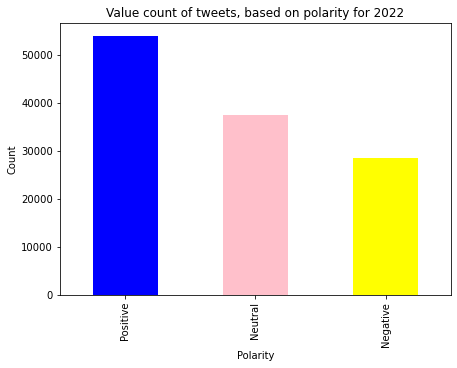

In [97]:
fig = plt.figure(figsize=(7,5))
color = ['blue','pink','yellow']
df_2022['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweets, based on polarity for 2022')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

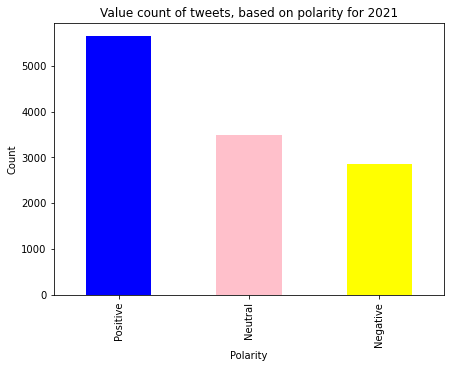

In [96]:
fig = plt.figure(figsize=(7,5))
color = ['blue','pink','yellow']
df_2021['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweets, based on polarity for 2021')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

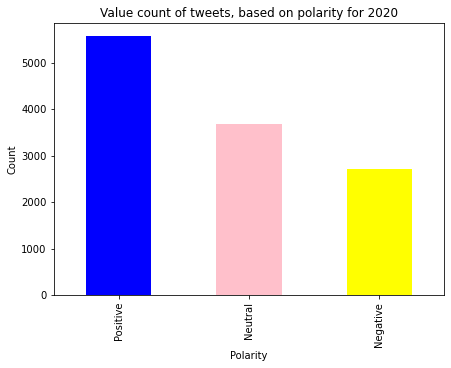

In [95]:
fig = plt.figure(figsize=(7,5))
color = ['blue','pink','yellow']
df_2020['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweets, based on polarity for 2020')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity for 2022')

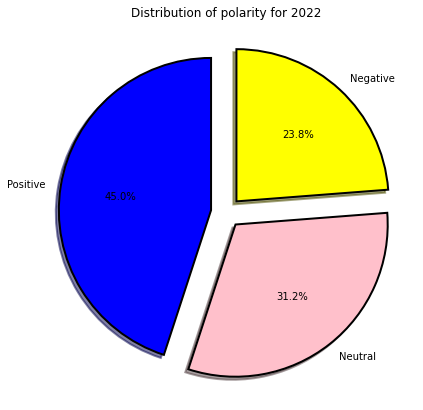

In [94]:
fig = plt.figure(figsize=(7,7))
colors = ('blue','pink','yellow')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df_2022['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity for 2022')

Text(0.5, 1.0, 'Distribution of polarity for 2021')

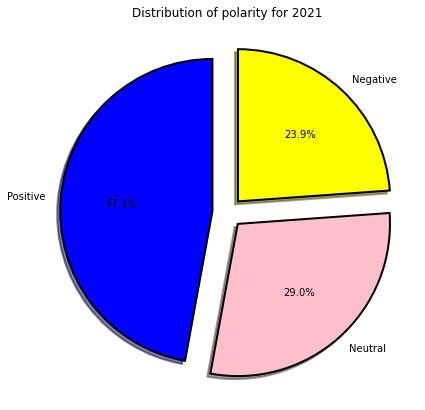

In [93]:
fig = plt.figure(figsize=(7,7))
colors = ('blue','pink','yellow')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df_2021['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity for 2021')

Text(0.5, 1.0, 'Distribution of polarity for 2020')

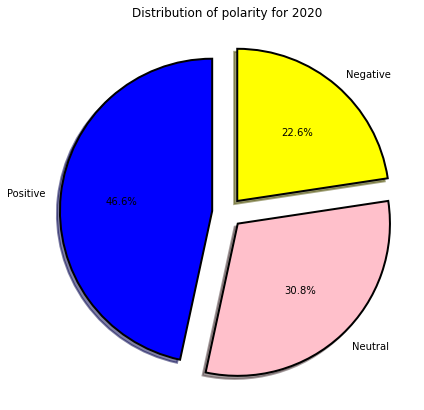

In [92]:
fig = plt.figure(figsize=(7,7))
colors = ('blue','pink','yellow')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df_2020['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity for 2020')

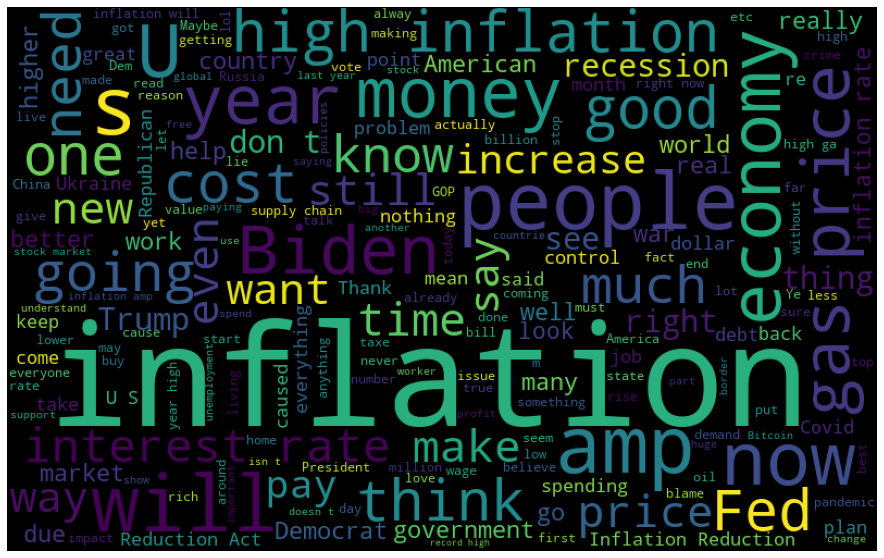

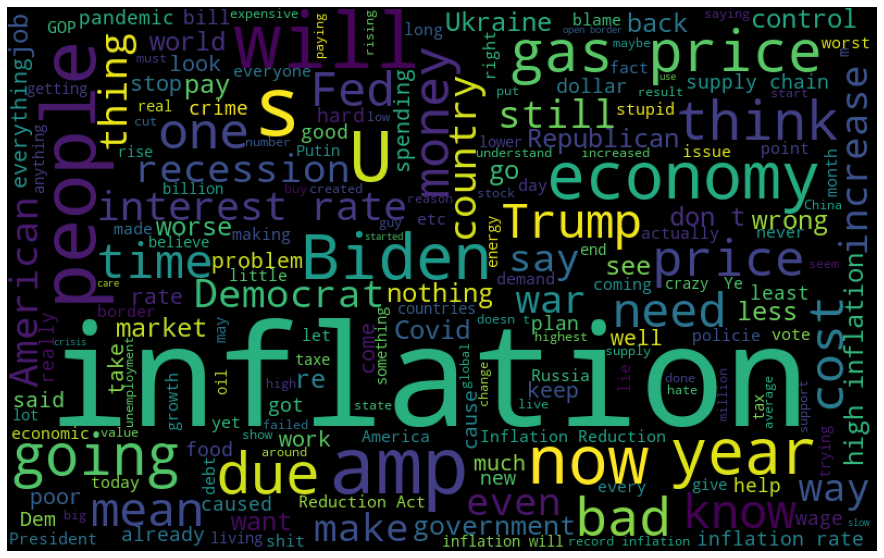

In [91]:
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='black', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = df_2022.loc[df_2022['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = df_2022.loc[df_2022['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

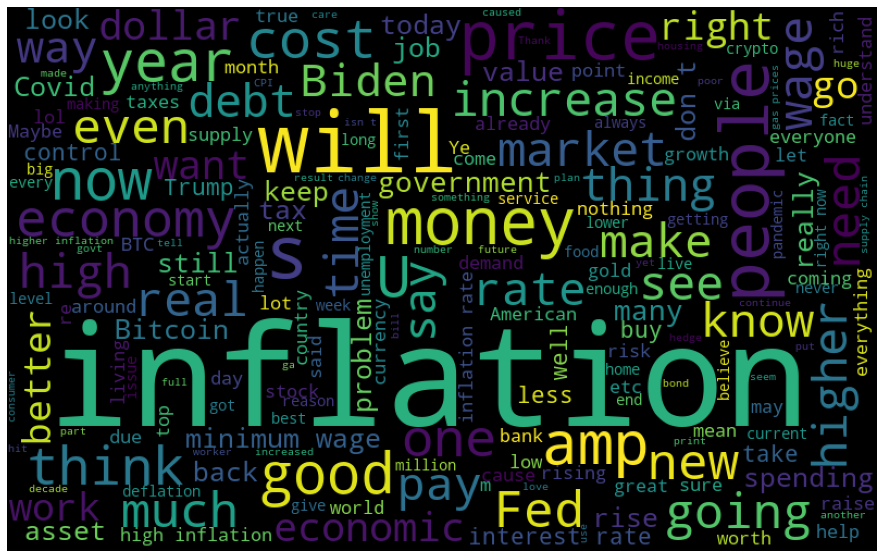

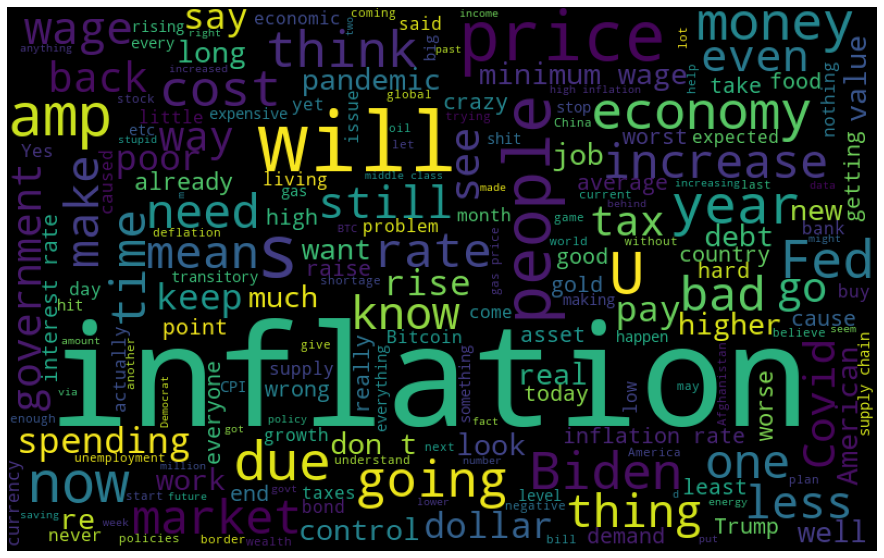

In [90]:
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='black', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = df_2021.loc[df_2021['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = df_2021.loc[df_2021['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

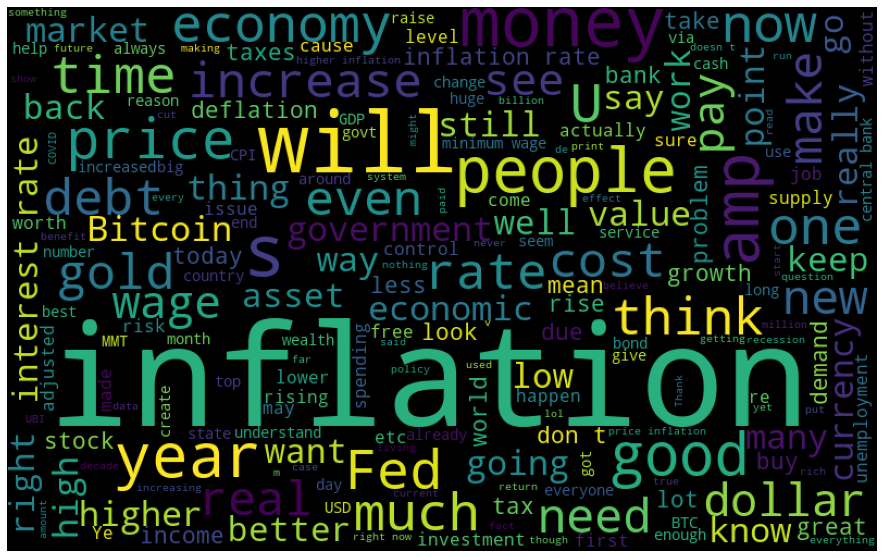

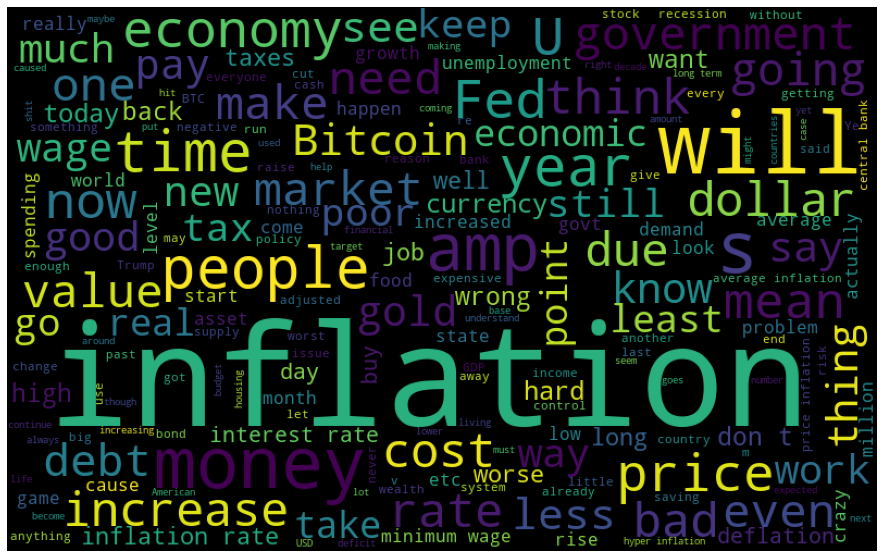

In [89]:
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='black', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = df_2020.loc[df_2020['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = df_2020.loc[df_2020['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

In [80]:
df_2022

,Text,cleanedTweets,Subjectivity,Polarity,Analysis
0,@ThisChickBev Inflation,Inflation,0.000000,0.000000,Neutral
1,"@SecYellen &amp; inflation at 7% , Americans a...","&amp; inflation at 7% , Americans are not tha...",0.000000,0.000000,Neutral
2,@America00983474 @BayAreaSportsF7 @Chechi70 @e...,Half of these are out of context lmfao p...,0.218333,0.066667,Positive
3,David Dayan clearly explains how the current i...,David Dayan clearly explains how the current i...,0.261111,0.033333,Positive
4,"@JoeBiden Inflation, Joe. It’s on you. Stop ...","Inflation, Joe. It’s on you. Stop spinning ...",0.866667,-0.633333,Negative
...,...,...,...,...,...
120007,2023 - Recession And Inflation. https://t.co/x...,2023 - Recession And Inflation.,0.000000,0.000000,Neutral
120008,@POTUS Record inflation *,Record inflation *,0.000000,0.000000,Neutral
120009,@romanianrosieee Biden inflation,Biden inflation,0.000000,0.000000,Neutral
120010,"@cherry_lfc @POTUS Your student debt isn't ""fo...","Your student debt isn't ""forgiven"". It still...",0.333333,0.166667,Positive


## Lets turn the words into feature vectors so that we can analyze the numerical importance of certain word combinations

In [81]:
#Removing Punctuation
import string
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
df_2022['punct'] = df_2022['cleanedTweets'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df_2022['tokenized'] = df_2022['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df_2022['nonstop'] = df_2022['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df_2022['stemmed'] = df_2022['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df_2022.head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_21724/2336315347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['punct'] = df_2022['cleanedTweets'].apply(lambda x: remove_punct(x))
C:\Users\rahul\AppData\Local\Temp/ipykernel_21724/2336315347.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['tokenized'] = df_2022['punct'].apply(lambda x: tokenization(x.lower()))
C:\Users\rahul\AppData\Local\Temp/ipykernel_21724/2336315347.py:19: SettingWithCopyWarning: 
A value is trying to be set on a c

,Text,cleanedTweets,Subjectivity,Polarity,Analysis,punct,tokenized,nonstop,stemmed
0,@ThisChickBev Inflation,Inflation,0.000000,0.000000,Neutral,Inflation,"[, inflation]","[, inflation]","[, inflat]"
1,"@SecYellen &amp; inflation at 7% , Americans a...","&amp; inflation at 7% , Americans are not tha...",0.000000,0.000000,Neutral,amp inflation at 7 Americans are not that ig...,"[, amp, inflation, at, 7, americans, are, not,...","[, amp, inflation, 7, americans, ignorant]","[, amp, inflat, 7, american, ignor]"
2,@America00983474 @BayAreaSportsF7 @Chechi70 @e...,Half of these are out of context lmfao p...,0.218333,0.066667,Positive,Half of these are out of context lmfao p...,"[, half, of, these, are, out, of, context, lmf...","[, half, context, lmfao, please, look, unemplo...","[, half, context, lmfao, pleas, look, unemploy..."
3,David Dayan clearly explains how the current i...,David Dayan clearly explains how the current i...,0.261111,0.033333,Positive,David Dayan clearly explains how the current i...,"[david, dayan, clearly, explains, how, the, cu...","[david, dayan, clearly, explains, current, inf...","[david, dayan, clearli, explain, current, infl..."
4,"@JoeBiden Inflation, Joe. It’s on you. Stop ...","Inflation, Joe. It’s on you. Stop spinning ...",0.866667,-0.633333,Negative,Inflation Joe It’s on you Stop spinning pos...,"[, inflation, joe, it, s, on, you, stop, spinn...","[, inflation, joe, stop, spinning, post, pande...","[, inflat, joe, stop, spin, post, pandem, reco..."


In [82]:
import string
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
df_2021['punct'] = df_2021['cleanedTweets'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df_2021['tokenized'] = df_2021['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df_2021['nonstop'] = df_2021['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df_2021['stemmed'] = df_2021['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df_2021.head()

,Text,cleanedTweets,Subjectivity,Polarity,Analysis,punct,tokenized,nonstop,stemmed
0,@CBCTheNational And yet she gets a lifetime in...,And yet she gets a lifetime inflation protect...,0.000000,0.00,Neutral,And yet she gets a lifetime inflation protect...,"[, and, yet, she, gets, a, lifetime, inflation...","[, yet, gets, lifetime, inflation, protected, ...","[, yet, get, lifetim, inflat, protect, pension]"
1,@FUT_NoTime @Psemy_FUT Solange man mit dem gel...,Solange man mit dem geld was man sparrt was ...,0.000000,0.00,Neutral,Solange man mit dem geld was man sparrt was ...,"[, solange, man, mit, dem, geld, was, man, spa...","[, solange, man, mit, dem, geld, man, sparrt, ...","[, solang, man, mit, dem, geld, man, sparrt, a..."
2,@film_girl Also remember that the stock market...,Also remember that the stock market and the h...,0.357143,0.00,Neutral,Also remember that the stock market and the h...,"[, also, remember, that, the, stock, market, a...","[, also, remember, stock, market, housing, mar...","[, also, rememb, stock, market, hous, market, ..."
3,@Poojawa I'm pretty sure I saw someone say the...,I'm pretty sure I saw someone say the same bi...,0.671296,0.25,Positive,Im pretty sure I saw someone say the same bil...,"[, im, pretty, sure, i, saw, someone, say, the...","[, im, pretty, sure, saw, someone, say, bill, ...","[, im, pretti, sure, saw, someon, say, bill, t..."
4,But don’t think that the way to avoid Wall Str...,But don’t think that the way to avoid Wall Str...,0.000000,0.00,Neutral,But don’t think that the way to avoid Wall Str...,"[but, don, t, think, that, the, way, to, avoid...","[think, way, avoid, wall, street, chaos, inves...","[think, way, avoid, wall, street, chao, invest..."


In [48]:
import string
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
df_2020['punct'] = df_2020['cleanedTweets'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df_2020['tokenized'] = df_2020['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df_2020['nonstop'] = df_2020['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df_2020['stemmed'] = df_2020['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df_2020.head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_21724/274530401.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['punct'] = df_2020['cleanedTweets'].apply(lambda x: remove_punct(x))
C:\Users\rahul\AppData\Local\Temp/ipykernel_21724/274530401.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['tokenized'] = df_2020['punct'].apply(lambda x: tokenization(x.lower()))
C:\Users\rahul\AppData\Local\Temp/ipykernel_21724/274530401.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Text,cleanedTweets,Subjectivity,Polarity,Analysis,punct,tokenized,nonstop,stemmed
0,@childshgamdeemo stop posting my little porny ...,stop posting my little porny inflation porn.,0.000000,0.000000,Neutral,stop posting my little porny inflation porn,"[, stop, posting, my, little, porny, inflation...","[, stop, posting, little, porny, inflation, porn]","[, stop, post, littl, porni, inflat, porn]"
1,@TheLordMidge Do you understand figures - the ...,Do you understand figures - the NHS is now 3....,0.000000,0.000000,Neutral,Do you understand figures the NHS is now 34 ...,"[, do, you, understand, figures, the, nhs, is,...","[, understand, figures, nhs, 34, gdp, used, 6,...","[, understand, figur, nh, 34, gdp, use, 6, chr..."
2,@santoshgangwar @socialepfo @PMOIndia @nsithar...,When does government make EPF pen...,0.218333,0.066667,Positive,When does government make EPF pen...,"[, when, does, government, make, epf, pension,...","[, government, make, epf, pension, inflation, ...","[, govern, make, epf, pension, inflat, link]"
3,@infinitelotus3 Inflation happens regardless o...,Inflation happens regardless of wether or not...,0.261111,0.033333,Positive,Inflation happens regardless of wether or not...,"[, inflation, happens, regardless, of, wether,...","[, inflation, happens, regardless, wether, inc...","[, inflat, happen, regardless, wether, incom, ..."
4,"Markets are at all time highs, how much more d...","Markets are at all time highs, how much more d...",0.866667,-0.633333,Negative,Markets are at all time highs how much more do...,"[markets, are, at, all, time, highs, how, much...","[markets, time, highs, much, fed, want, take, ...","[market, time, high, much, fed, want, take, re..."


In [83]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df_2021['cleanedTweets'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df

11987 Number of tweets has 17441 words


,,aa,aaaaah,aahhn,aan,aankh,aap,aapk,aapko,aapl,...,英語発音,製造負曲率,退出宽松战略,通貨収縮,金利は下げてるように見えるけど,金利は反落,金利は続騰,鲍威尔重申会提前沟通,좋아요,좋앗
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11982,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11983,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11985,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df_2020['cleanedTweets'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df

11970 Number of tweets has 20502 words


,,aa,aaa,aaaannnddd,aaap,aab,aad,aadat,aag,aah,...,𝘪𝘯,𝘪𝘯𝘧𝘭𝘢𝘵𝘪𝘰𝘯,𝘮𝘢𝘬𝘦,𝘰𝘧,𝘰𝘱𝘵𝘪𝘰𝘯𝘴,𝘴,𝘵𝘩𝘦,𝘵𝘰,𝘶𝘭𝘵𝘪𝘮𝘢𝘵𝘦,𝙩𝙧𝙖𝙘𝙠𝙚𝙙
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11965,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11966,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11967,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11968,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analysis using N grams

In [85]:
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(df_2021['cleanedTweets'],(2,2),20)
n2_bigrams

[('minimum wage', 325),
 ('inflation rate', 202),
 ('high inflation', 196),
 ('gas prices', 145),
 ('price inflation', 132),
 ('supply chain', 132),
 ('hyper inflation', 130),
 ('cost living', 118),
 ('rising inflation', 109),
 ('higher inflation', 108),
 ('adjusted inflation', 108),
 ('cause inflation', 105),
 ('middle class', 100),
 ('inflation just', 95),
 ('hedge inflation', 92),
 ('stock market', 88),
 ('long term', 88),
 ('inflation expectations', 86),
 ('inflation going', 85),
 ('rate inflation', 84)]

In [86]:
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(df_2020['cleanedTweets'],(2,2),20)
n2_bigrams

[('inflation rate', 293),
 ('adjusted inflation', 229),
 ('minimum wage', 206),
 ('price inflation', 196),
 ('low inflation', 166),
 ('hyper inflation', 161),
 ('cause inflation', 138),
 ('inflation adjusted', 137),
 ('high inflation', 116),
 ('higher inflation', 116),
 ('rate inflation', 112),
 ('long term', 111),
 ('money supply', 111),
 ('inflation rates', 108),
 ('printing money', 108),
 ('inflation deflation', 107),
 ('inflation amp', 100),
 ('inflation target', 99),
 ('central bank', 97),
 ('monetary policy', 96)]

In [87]:
n3_trigrams = get_top_n_gram(df_2021['cleanedTweets'],(3,3),20)
n3_trigrams

[('fed chair powell', 48),
 ('supply chain issues', 35),
 ('powell warn congress', 35),
 ('warn congress inflation', 35),
 ('congress inflation pressures', 32),
 ('inflation pressures longer', 32),
 ('pressures longer expected', 32),
 ('30 silver pieces', 28),
 ('inflation gas prices', 28),
 ('chair powell warn', 28),
 ('high gas prices', 26),
 ('asset price inflation', 23),
 ('inflation cost living', 22),
 ('gas prices inflation', 21),
 ('raising minimum wage', 20),
 ('raise minimum wage', 20),
 ('inflation supply chain', 20),
 ('consumer price index', 18),
 ('15 min wage', 16),
 ('says spike inflation', 16)]

In [88]:
n3_trigrams = get_top_n_gram(df_2020['cleanedTweets'],(3,3),20)
n3_trigrams

[('asset price inflation', 52),
 ('average inflation targeting', 32),
 ('net asset value', 26),
 ('low inflation rates', 25),
 ('threat low inflation', 24),
 ('house price inflation', 22),
 ('annual inflation rate', 21),
 ('rates amid virus', 21),
 ('amid virus threat', 21),
 ('virus threat low', 21),
 ('15 drop exports', 20),
 ('raising minimum wage', 19),
 ('ucits etf acc', 19),
 ('etf acc net', 19),
 ('acc net asset', 19),
 ('seen slashing rates', 19),
 ('slashing rates amid', 19),
 ('protect investments inflation', 19),
 ('drop exports inflation', 19),
 ('federal minimum wage', 18)]

## It can be seen that the majority of the tweets are warnings and clarion calls instead of pure blame spread over the internet. Thats why we majorily see helping hands, planning and optimism about the inflation state. This can be seen with the trigrams of 2021 where fed "chairman powell warns the congress about inflation". There is also discussions about increasing minimum wage. And there are complains such as "gas prices increasing" and "supply chain issues" due to the inflation. 

## 2020 still shows the effect of the covid situation on the economy with trigrams such as "virus threat low", "rates amid virus" etc. There has been good predictions as well in 2020 itself with trigrams such as "protect investments inflation", "drop exports inflation"